In [1]:
import pandas as pd

df_notes = pd.read_csv(r'C:\Users\nelso\Documents\Master Thesis\method_i\datasets_for_analysis\notes_dataset_verified.csv')

df_ratings = pd.read_csv(r'C:\Users\nelso\Documents\Master Thesis\method_i\ratings_dataset_cleaned_v3.csv')

df_notes.info()
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805975 entries, 0 to 805974
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   noteId                                  805975 non-null  int64  
 1   createdAtMillis                         805975 non-null  int64  
 2   classification                          805975 non-null  object 
 3   misleadingOther                         805975 non-null  int64  
 4   misleadingFactualError                  805975 non-null  int64  
 5   misleadingManipulatedMedia              805975 non-null  int64  
 6   misleadingOutdatedInformation           805975 non-null  int64  
 7   misleadingMissingImportantContext       805975 non-null  int64  
 8   misleadingUnverifiedClaimAsFact         805975 non-null  int64  
 9   misleadingSatire                        805975 non-null  int64  
 10  notMisleadingOther                      8059

In [2]:
# Add the specified columns from df_notes to df_ratings using noteId as the key
df_ratings = df_ratings.merge(
    df_notes[['noteId', 'noteFromEFCSN', 'noteFromEDMO', 'noteFromOtherSource']], 
    on='noteId', 
    how='left'
)

df_ratings.info()
df_ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9983058 entries, 0 to 9983057
Data columns (total 13 columns):
 #   Column                                Dtype  
---  ------                                -----  
 0   noteId                                int64  
 1   createdAtMillis                       int64  
 2   agree                                 int64  
 3   disagree                              int64  
 4   helpfulnessLevel                      object 
 5   helpfulGoodSources                    int64  
 6   helpfulImportantContext               int64  
 7   notHelpfulSourcesMissingOrUnreliable  int64  
 8   notHelpfulOpinionSpeculationOrBias    int64  
 9   notHelpfulHardToUnderstand            int64  
 10  noteFromEFCSN                         float64
 11  noteFromEDMO                          float64
 12  noteFromOtherSource                   float64
dtypes: float64(3), int64(9), object(1)
memory usage: 990.1+ MB


,noteId,createdAtMillis,agree,disagree,helpfulnessLevel,helpfulGoodSources,helpfulImportantContext,notHelpfulSourcesMissingOrUnreliable,notHelpfulOpinionSpeculationOrBias,notHelpfulHardToUnderstand,noteFromEFCSN,noteFromEDMO,noteFromOtherSource
0,1849246700252401952,1729735019612,0,0,HELPFUL,1,0,0,0,0,0.0,0.0,1.0
1,1875194033124807036,1735917430088,0,0,NOT_HELPFUL,0,0,1,0,0,0.0,0.0,1.0
2,1763674558630924339,1709516850112,0,0,HELPFUL,0,0,0,0,0,0.0,0.0,1.0
3,1818977412241121325,1723134256278,0,0,NOT_HELPFUL,0,0,1,0,0,0.0,0.0,1.0
4,1829177243765248225,1725016342561,0,0,HELPFUL,1,0,0,0,0,0.0,0.0,1.0


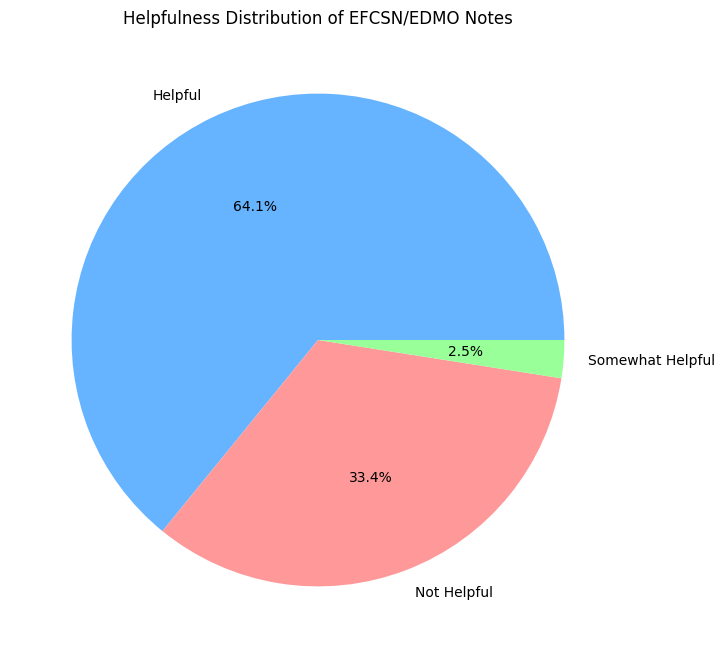

In [22]:
import matplotlib.pyplot as plt
# Filter ratings for EFCSN or EDMO notes
df_efcsn_edmo = df_ratings[
    (df_ratings['noteFromEFCSN'] == 1) | 
    (df_ratings['noteFromEDMO'] == 1)
]

# Calculate helpfulness distribution
helpfulness_counts = df_efcsn_edmo['helpfulnessLevel'].value_counts()
total = len(df_efcsn_edmo)

helpfulness_percentages = [
    (helpfulness_counts['HELPFUL'] / total * 100),
    (helpfulness_counts['NOT_HELPFUL'] / total * 100),
    (helpfulness_counts['SOMEWHAT_HELPFUL'] / total * 100)
]

plt.figure(figsize=(8, 8))
plt.pie(helpfulness_percentages, 
        labels=['Helpful', 'Not Helpful', 'Somewhat Helpful'],
        colors=['#66b3ff', '#ff9999', '#99ff99'],
        autopct='%1.1f%%')
plt.title('Helpfulness Distribution of EFCSN/EDMO Notes')
plt.show()


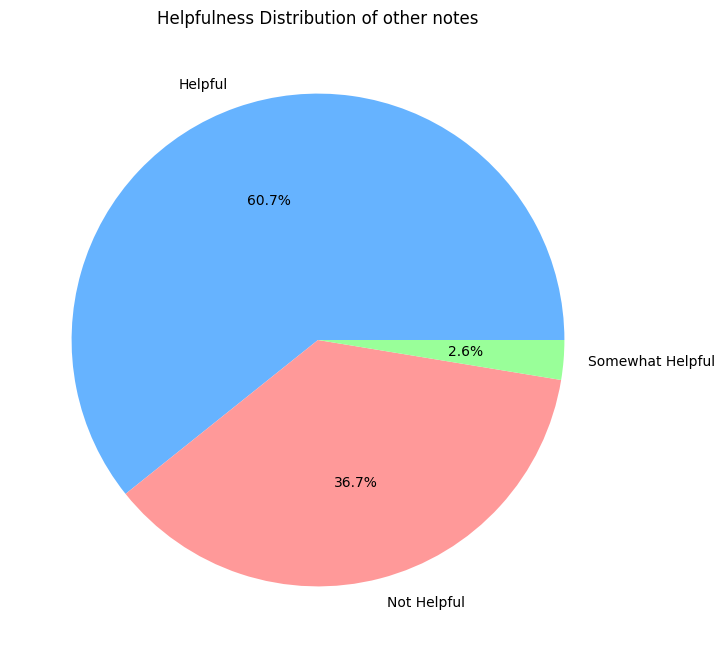

In [36]:
import matplotlib.pyplot as plt

df_other = df_ratings[
    (df_ratings['noteFromOtherSource'] == 1)  
]


# Calculate helpfulness distribution for notes from other sources
helpfulness_counts = filtered_df_other['helpfulnessLevel'].value_counts()
total = len(filtered_df_other)
helpfulness_percentages = [
    (helpfulness_counts['HELPFUL'] / total * 100),
    (helpfulness_counts['NOT_HELPFUL'] / total * 100),
    (helpfulness_counts['SOMEWHAT_HELPFUL'] / total * 100)
]

plt.figure(figsize=(8, 8))
plt.pie(helpfulness_percentages, 
        labels=['Helpful', 'Not Helpful', 'Somewhat Helpful'],
        colors=['#66b3ff', '#ff9999', '#99ff99'],
        autopct='%1.1f%%')
plt.title('Helpfulness Distribution of other notes')
plt.show()

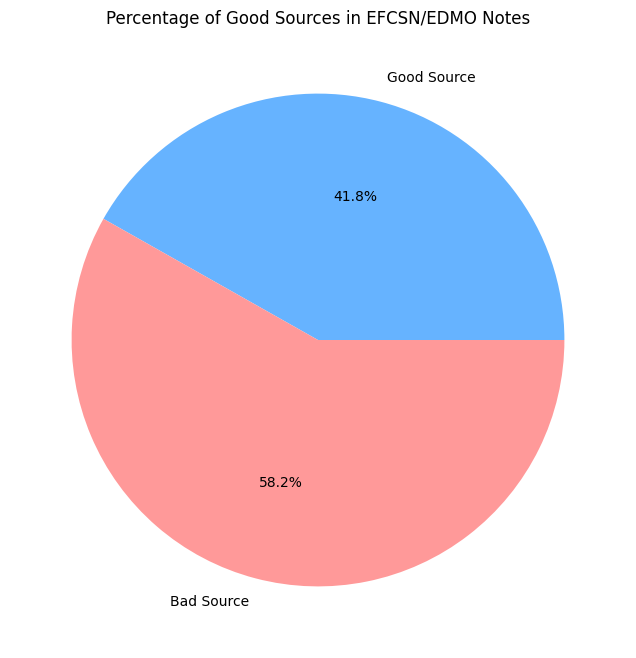

In [26]:
# Filter for EFCSN/EDMO notes and calculate percentage of helpfulGoodSources
df_sources = df_ratings[
    (df_ratings['noteFromEFCSN'] == 1) | 
    (df_ratings['noteFromEDMO'] == 1)
]

good_sources_count = df_sources['helpfulGoodSources'].sum()
total_count = len(df_sources)
good_sources_pct = good_sources_count / total_count * 100

plt.figure(figsize=(8, 8))
plt.pie([good_sources_pct, 100-good_sources_pct],
        labels=['Good Source', 'Bad Source'],
        colors=['#66b3ff', '#ff9999'],
        autopct='%1.1f%%')
plt.title('Percentage of Good Sources in EFCSN/EDMO Notes')
plt.show()

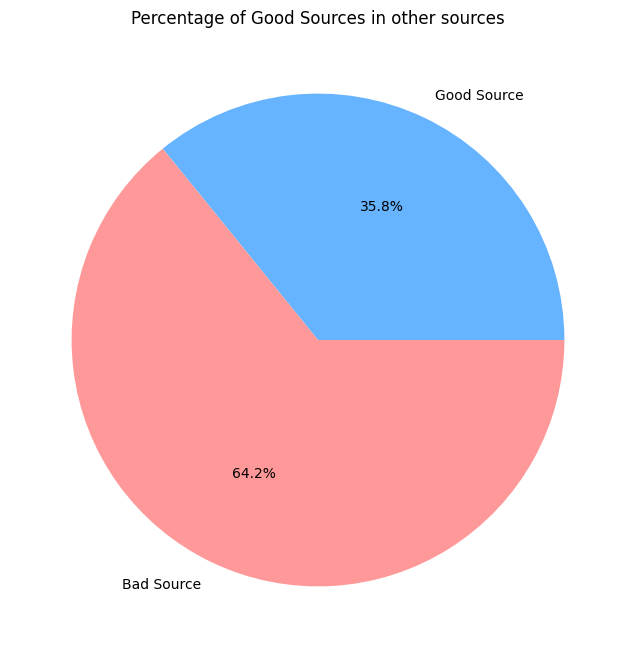

In [30]:
# Filter for EFCSN/EDMO notes and calculate percentage of helpfulGoodSources
df_sources = df_ratings[
    (df_ratings['noteFromOtherSource'] == 1)
]

good_sources_count = df_sources['helpfulGoodSources'].sum()
total_count = len(df_sources)
good_sources_pct = good_sources_count / total_count * 100

plt.figure(figsize=(8, 8))
plt.pie([good_sources_pct, 100-good_sources_pct],
        labels=['Good Source', 'Bad Source'],
        colors=['#66b3ff', '#ff9999'],
        autopct='%1.1f%%')
plt.title('Percentage of Good Sources in other sources')
plt.show()